## Objective:
1. Apply SVM  on the vehicle data set to predict class target.
1. Apply dimensionality reduction technique – PCA and train a model using principal components.
3. Compare the model accuracy result obtains on the both raw data and PCA data.



## Table of Contents

1. [Necessary libraries](#chapter1)
2. [Data Info](#chapter2)
3. [Data Preprocessing](#chapter3)
     * [Duplicated Value](#chapter3.1)
     * [Null Value Imputation](#chapter3.2)
     
     
4. [Visualization](#chapter4)
    * [Distribution Plot](#chapter4.1)
    * [Heat Map](#chapter4.2)
    
    
5. [Feature Engineering](#chapter5)
    * [Outlier Detection using BoxPlot](#chapter5.1)
    * [Label Encoding](#chapter5.2)
    * [Feature Selection](#chapter5.3)
    * [Standardization](#chapter5.4)
    
6. [ML Modelling](#chapter6)
    * [Support Vector Machine](#chapter6.1)
    * [Principle Components Analysis](#chapter6.2)
    * [Cross Validation using Kfold](#chapter6.3)
7. [Summary](#chapter7)
    



## 1. Necessary Libraries<a class="anchor" id="chapter1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC 
from sklearn.decomposition import PCA

## 2. Data Info<a class="anchor" id="chapter2"></a>

In [2]:
df=pd.read_csv("./Downloads/vehicle.csv")

In [3]:
df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [5]:
df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


## 3.Data preprocessing<a class="anchor" id="chapter3"></a>

### 3.1 Detection of duplication <a class="anchor" id="chapter3.1"></a>

In [6]:
df.duplicated().sum()

0

### 3.2 Null Value Imputation<a class="anchor" id="chapter3.2"></a>

In [7]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [8]:
#  Total null value
df.isnull().sum().sum()

41

In [9]:
#checking the different types of class of vehicle
df["class"].unique()

array(['van', 'car', 'bus'], dtype=object)

In [10]:
# counting the unique class type
df["class"].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [11]:
'''As the number of car is more than bus and van we cannot apply single median value for null value
here we will be replacing the null value with the median of the respecting class object'''


for i in df.columns[df.isnull().any()]:
    df[i][df["class"]=="car"]=df[i][df["class"]=="car"].fillna(df[i][df["class"]=="car"].median())
    df[i][df["class"]=="van"]=df[i][df["class"]=="van"].fillna(df[i][df["class"]=="van"].median())
    df[i][df["class"]=="bus"]=df[i][df["class"]=="bus"].fillna(df[i][df["class"]=="bus"].median())

In [12]:
df.isnull().sum()

# from  below result we can observe null value has been replaced

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

## 4. Visualization<a class="anchor" id="chapter4"></a>

### 4.1 Distribution Plot <a class="anchor" id="chapter4.1"></a>

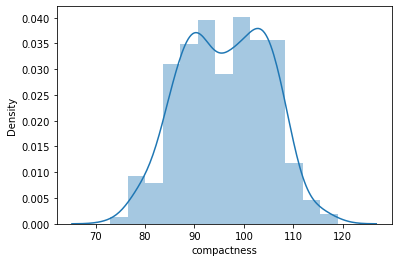

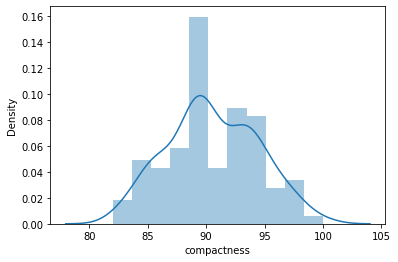

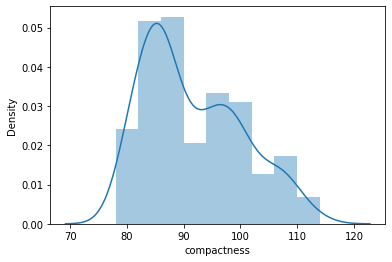

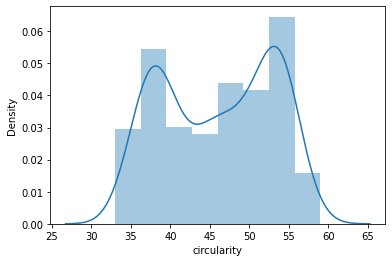

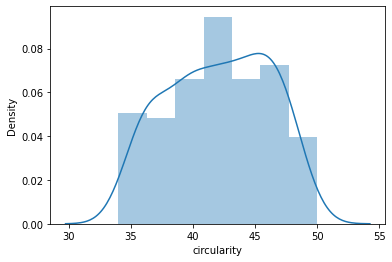

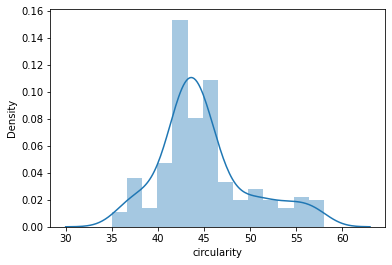

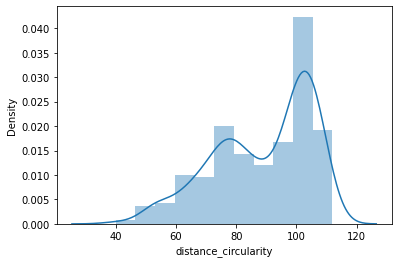

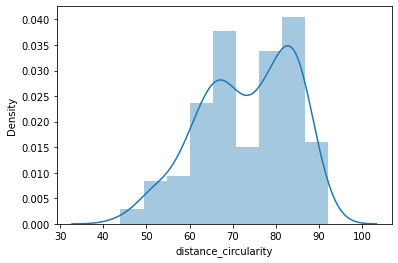

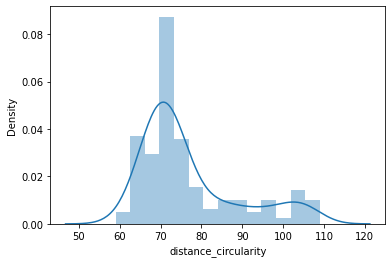

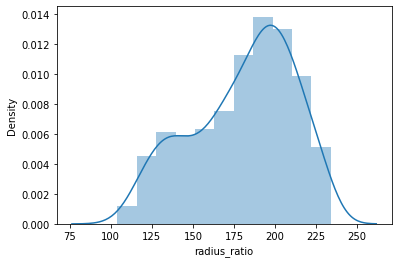

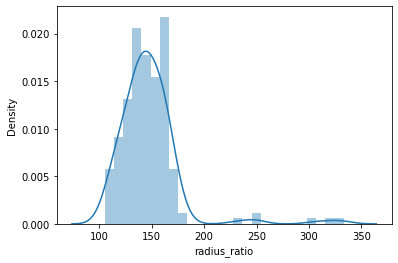

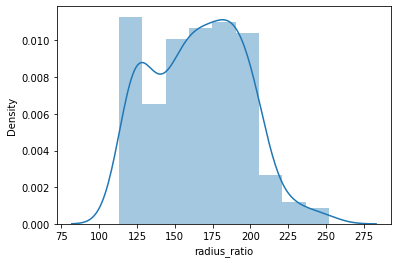

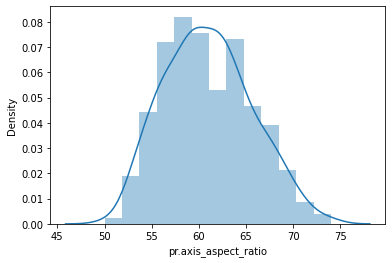

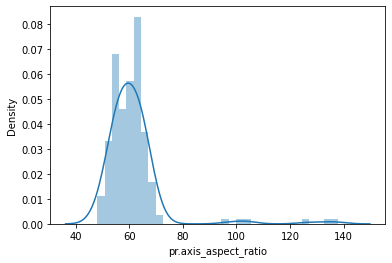

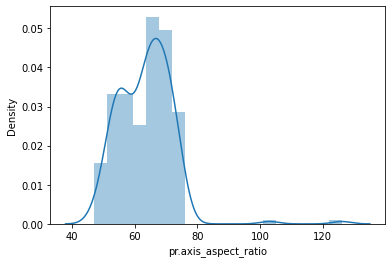

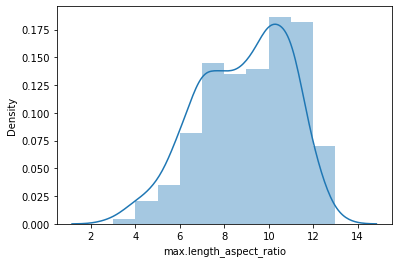

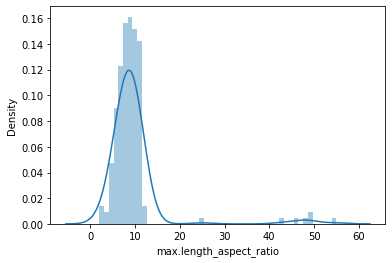

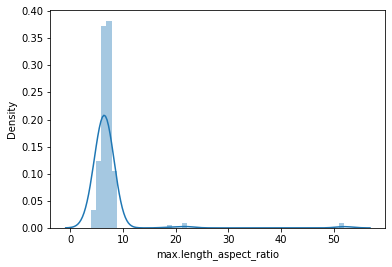

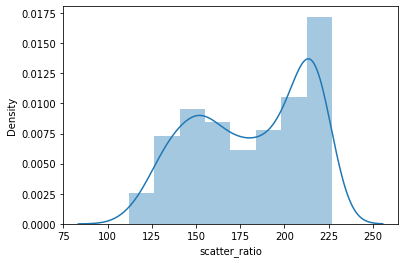

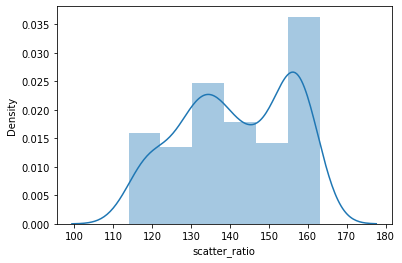

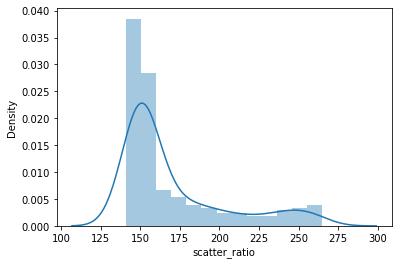

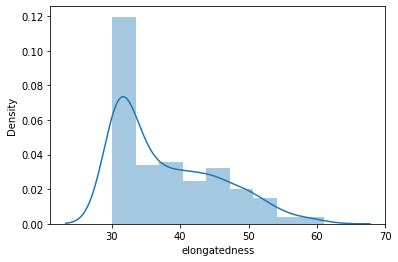

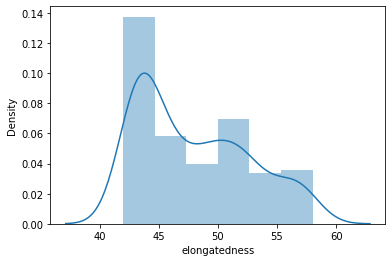

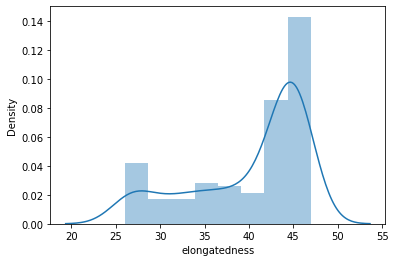

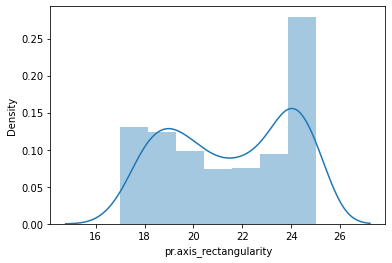

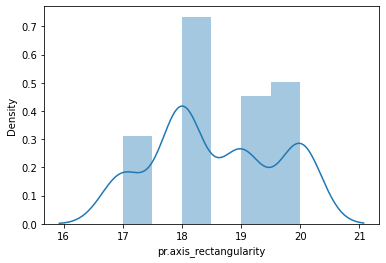

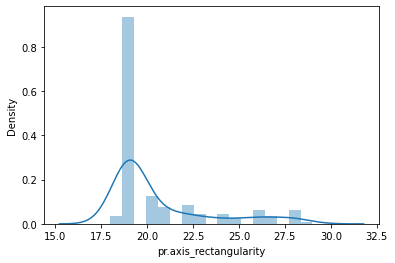

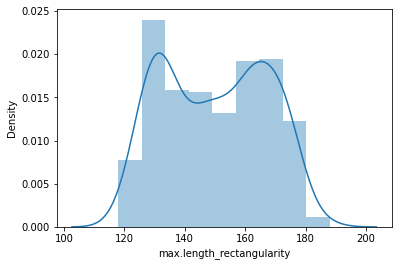

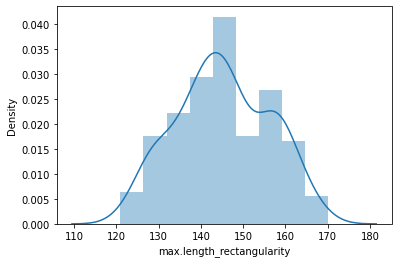

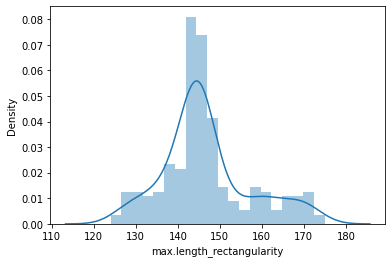

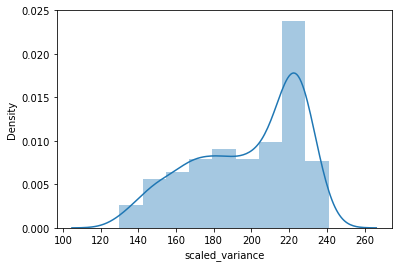

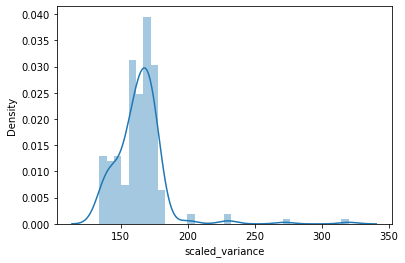

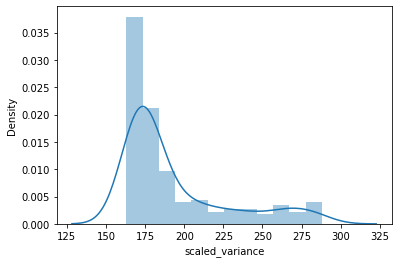

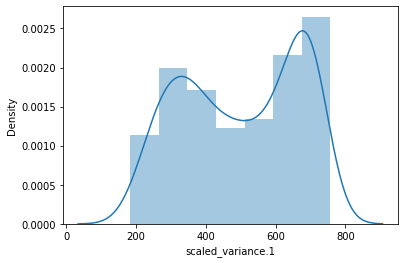

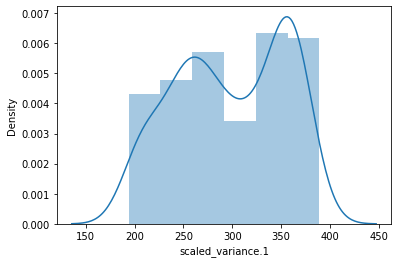

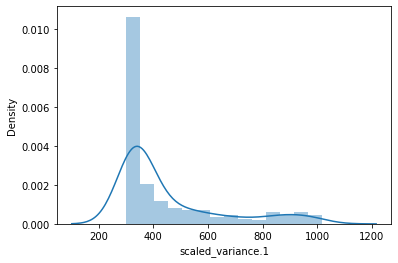

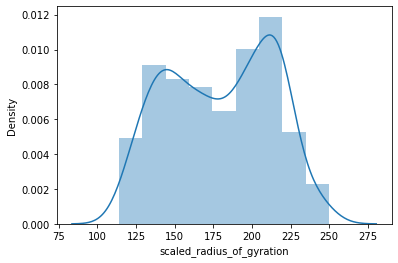

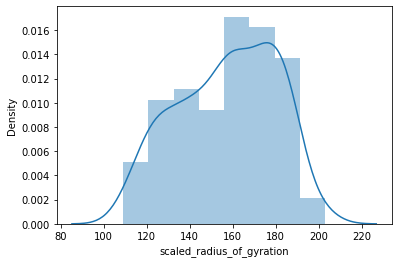

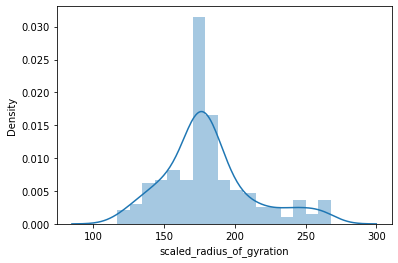

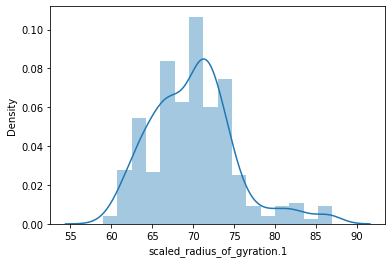

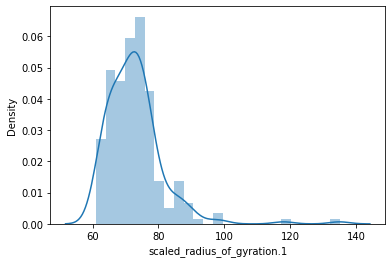

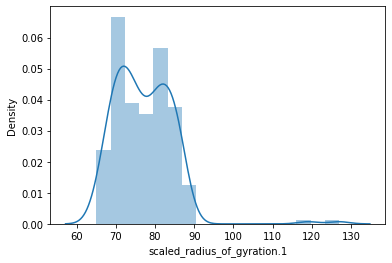

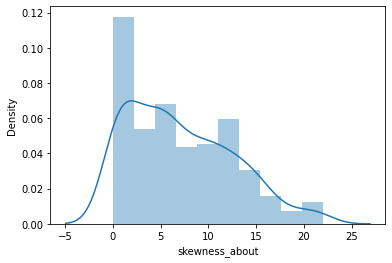

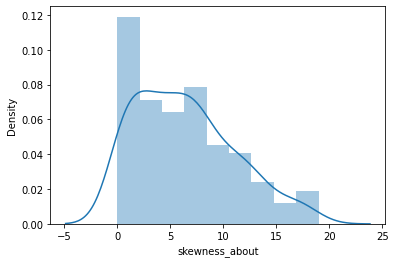

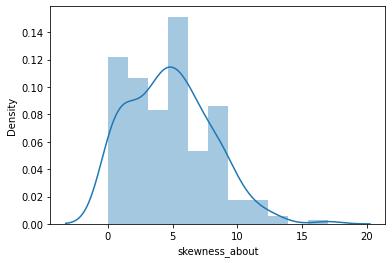

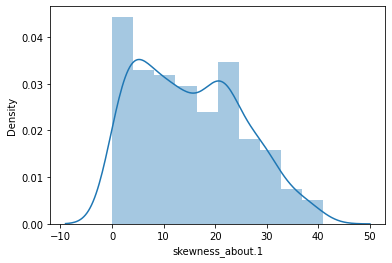

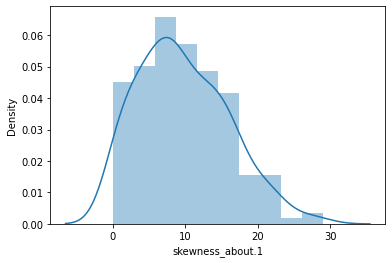

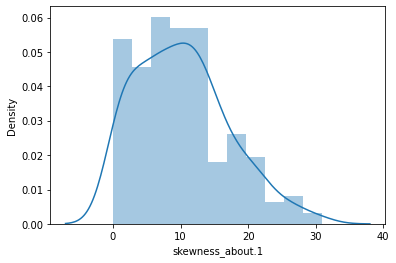

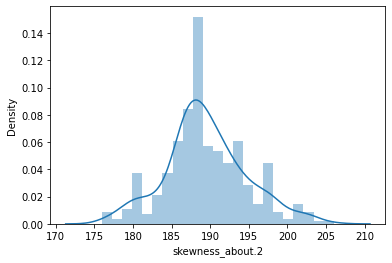

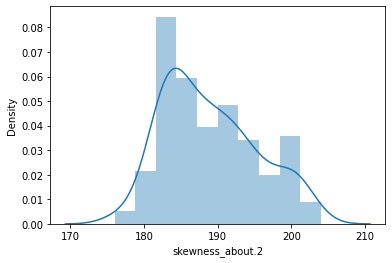

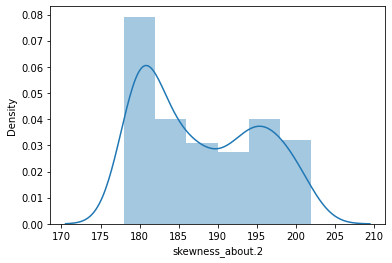

In [13]:
for i in df.columns[0:-2]:
    sns.distplot(df[i][df["class"]=="car"])
    plt.show()
    sns.distplot(df[i][df["class"]=="van"])
    plt.show()
    sns.distplot(df[i][df["class"]=="bus"])
    plt.show()

### 4.2 Heat Map<a class="anchor" id="chapter4.2"></a>

<AxesSubplot:>

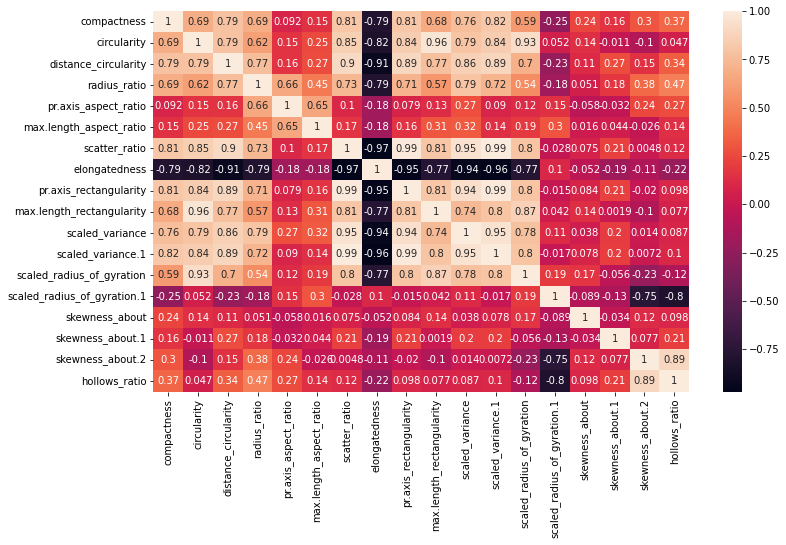

In [14]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

## 5. Feature Engineering<a class="anchor" id="chapter5"></a>

### 5.1 Outlier Detection<a class="anchor" id="chapter5.1"></a>

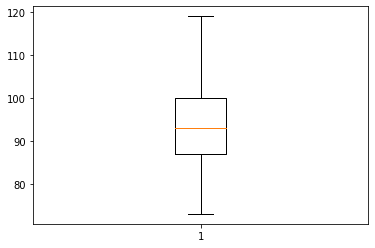

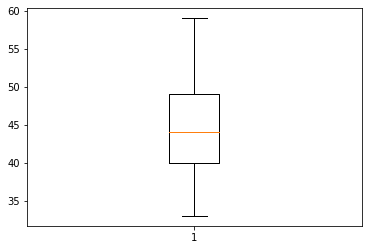

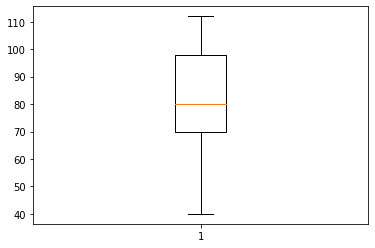

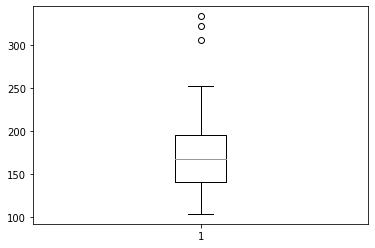

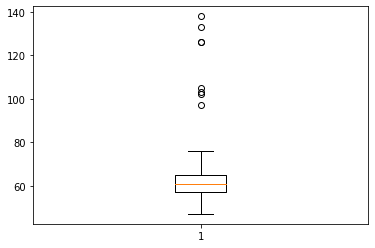

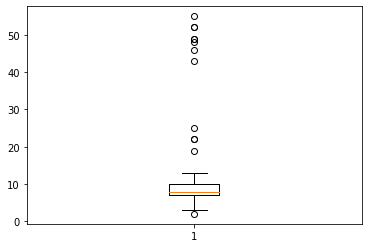

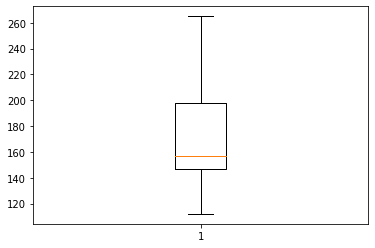

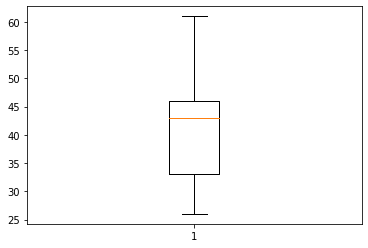

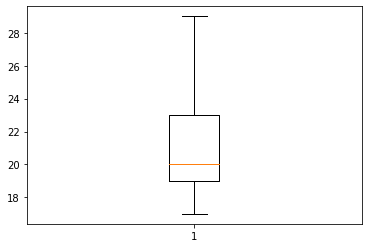

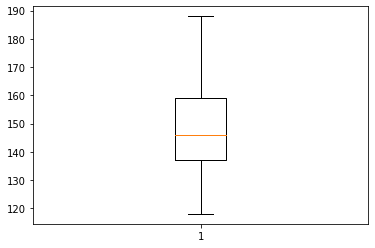

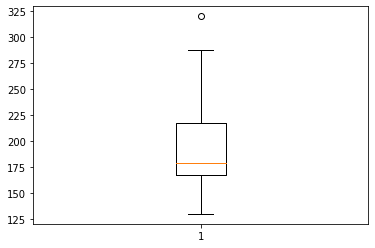

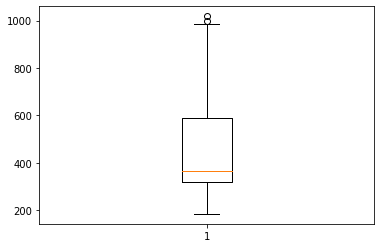

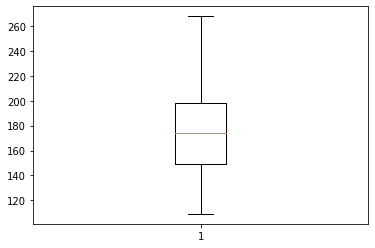

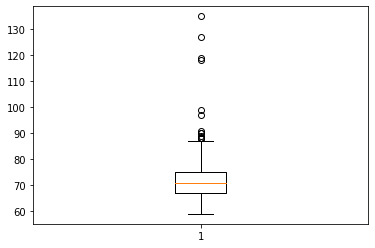

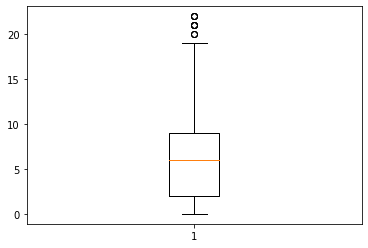

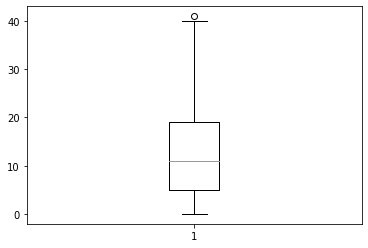

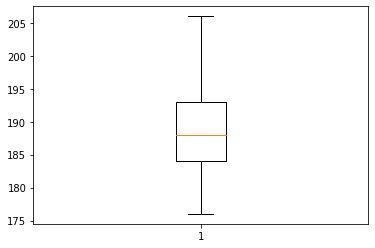

In [15]:
for i in df.columns[0:-2]:
    plt.boxplot(df[i])
    plt.show()

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

cleandf = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
cleandf.shape

(813, 19)

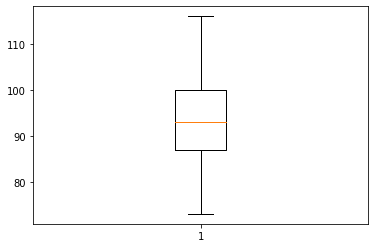

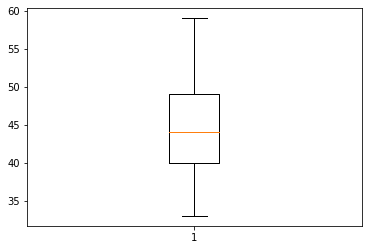

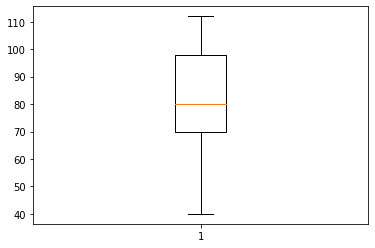

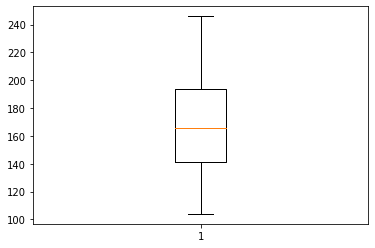

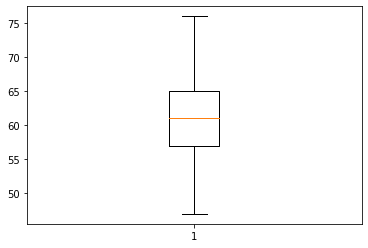

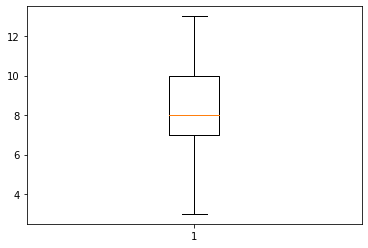

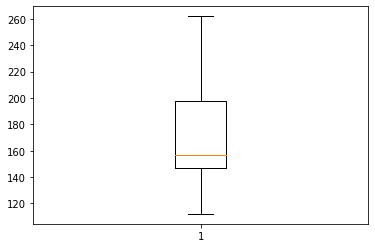

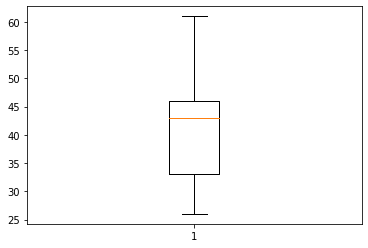

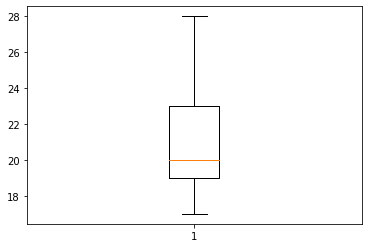

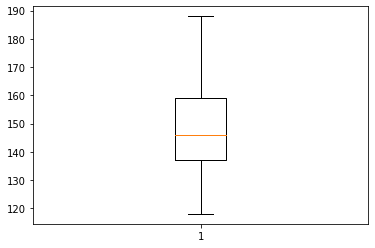

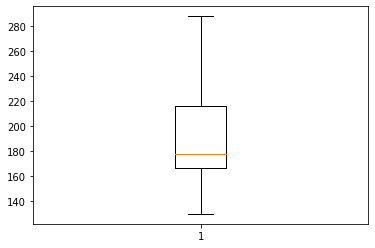

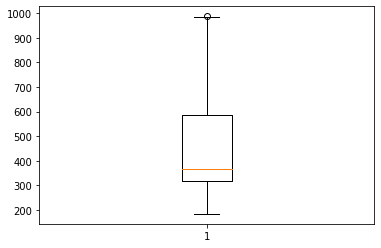

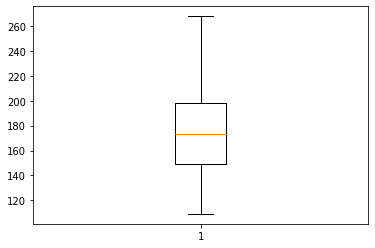

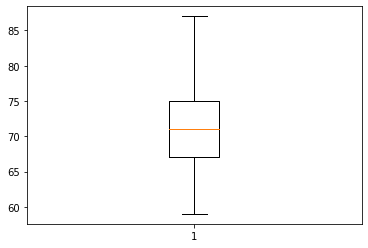

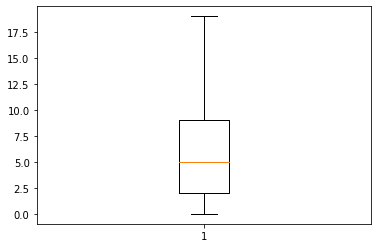

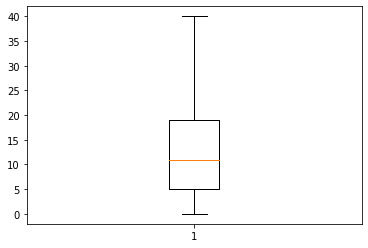

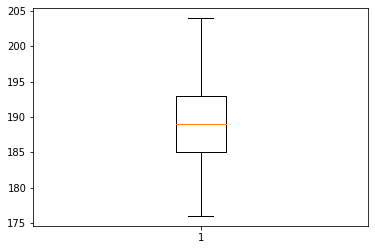

In [17]:
for i in cleandf.columns[0:-2]:
    plt.boxplot(cleandf[i])
    plt.show()

### 5.2 label Encoding<a class="anchor" id="chapter5.2"></a>

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
le = LabelEncoder()
columns = cleandf.columns
cleandf['class'] = le.fit_transform(cleandf['class'])
cleandf["class"]

0      2
1      2
2      1
3      2
5      0
      ..
841    1
842    2
843    1
844    1
845    2
Name: class, Length: 813, dtype: int32

In [19]:
cleandf

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
5,107,44.0,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,1
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,2
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,1
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,1


### 5.3 Feature Selection<a class="anchor" id="chapter5.3"></a>


In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [21]:
x=cleandf.iloc[:,:-1]
y=cleandf.iloc[:,-1]

In [22]:
bestfeature=SelectKBest(score_func=chi2,k=8)
fit=bestfeature.fit(x,y)

In [23]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

In [24]:
featurescores=pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns=["feaure","score"]

In [25]:
best_features=featurescores.nlargest(12,"score")
best_features

,feaure,score
11,scaled_variance.1,12100.589689
6,scatter_ratio,1199.795107
3,radius_ratio,1074.478706
10,scaled_variance,920.103185
2,distance_circularity,477.992708
15,skewness_about.1,441.118156
12,scaled_radius_of_gyration,424.954448
7,elongatedness,312.241924
5,max.length_aspect_ratio,102.250674
14,skewness_about,86.694119


In [26]:
features=["scaled_variance.1", "scatter_ratio",'radius_ratio',"scaled_variance",'distance_circularity','skewness_about.1','scaled_radius_of_gyration','elongatedness','max.length_aspect_ratio','skewness_about','scaled_radius_of_gyration.1','pr.axis_rectangularity','class']

In [27]:
svm_df=cleandf[features]
svm_df

,scaled_variance.1,scatter_ratio,radius_ratio,scaled_variance,distance_circularity,skewness_about.1,scaled_radius_of_gyration,elongatedness,max.length_aspect_ratio,skewness_about,scaled_radius_of_gyration.1,pr.axis_rectangularity,class
0,379.0,162.0,178.0,176.0,83.0,16.0,184.0,42.0,10,6.0,70.0,20.0,2
1,330.0,149.0,141.0,170.0,84.0,14.0,158.0,45.0,9,9.0,72.0,19.0,2
2,635.0,207.0,209.0,223.0,106.0,9.0,220.0,32.0,10,14.0,73.0,23.0,1
3,309.0,144.0,159.0,160.0,82.0,10.0,127.0,46.0,9,6.0,63.0,19.0,2
5,957.0,255.0,172.0,280.0,106.0,9.0,264.0,26.0,6,5.0,85.0,28.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,422.0,169.0,183.0,200.0,87.0,25.0,149.0,40.0,8,7.0,72.0,20.0,1
842,368.0,159.0,163.0,173.0,84.0,20.0,176.0,43.0,11,1.0,72.0,20.0,2
843,721.0,222.0,222.0,228.0,101.0,4.0,200.0,30.0,12,3.0,70.0,25.0,1
844,270.0,135.0,146.0,155.0,78.0,25.0,148.0,50.0,7,0.0,66.0,18.0,1


### 5.4 Standardization<a class="anchor" id="chapter5.4"></a>

In [28]:
from sklearn.preprocessing import StandardScaler
x=svm_df.iloc[:,:-1]
sc = StandardScaler()
X =  sc.fit_transform(x)
y=cleandf.iloc[:,-1].values

## 6. ML Modelling<a class="anchor" id="chapter6"></a>

### 6.1 Support Vector Machine<a class="anchor" id="chapter6.1"></a>

##### Applying svm on full dataset(18 feature)

In [29]:
from sklearn.model_selection import train_test_split 
x=cleandf.iloc[:,:-1]
sc = StandardScaler()
x_full =  sc.fit_transform(x)
x_train, x_test, y_train, y_test= train_test_split(x_full, y, test_size= 0.20, random_state=0) 
from sklearn.svm import SVC  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)
full_raw_acc=accuracy_score(y_test, y_pred)*100

# accuracy on  full raw data
full_raw_acc

97.54601226993866

##### SVM on Selected 12 Feature

In [30]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.20, random_state=0) 
from sklearn.svm import SVC  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [31]:
y_pred= classifier.predict(x_test) 

In [32]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 1, 2, 0, 2, 0, 2, 1,
       2, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0,
       1, 2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2, 0, 1, 1, 1, 0, 1, 2, 1, 2,
       2, 0, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1,
       1, 0, 2, 2, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 0,
       1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       2, 1, 1, 1, 1, 0, 2, 2, 2])

In [33]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 

In [34]:
cm

array([[39,  1,  1],
       [ 0, 77,  3],
       [ 0,  7, 35]], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score
svm_raw_acc=accuracy_score(y_test, y_pred)*100
# accuracy obtained
svm_raw_acc

92.63803680981594

### 6.2 Principle components analysis<a class="anchor" id="chapter6.2"></a>


In [36]:
w=cleandf.iloc[:,:-1]
sc = StandardScaler()
W =  sc.fit_transform(w)

from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
pca.fit(W)
x_pca=pca.transform(W)
x_pca.shape

(813, 7)

In [37]:
x_pca

array([[ 0.58975484, -0.65348117, -0.57704919, ..., -0.84927832,
        -1.83686151, -0.15631359],
       [-1.5259193 , -0.32841361, -0.23895852, ..., -0.28239039,
        -0.09354205,  0.2084022 ],
       [ 3.96693803,  0.23915682, -1.2267099 , ...,  0.92357445,
        -0.64600843,  0.82686757],
       ...,
       [ 5.18534517, -0.16822543, -0.60234632, ..., -1.34890329,
         0.22410262,  0.88678486],
       [-3.32176418, -1.09461636,  1.93155104, ..., -0.53395292,
        -0.0325108 , -0.2650713 ],
       [-5.01255315,  0.43103036,  1.31538375, ..., -0.17177907,
         0.34456781, -0.41317713]])

In [38]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x_pca, y, test_size= 0.20, random_state=0) 
from sklearn.svm import SVC  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)

y_pred= classifier.predict(x_test) 

In [39]:
y_pred

array([0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 2, 0, 2, 0, 2, 1,
       2, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 0, 0, 0,
       1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 0, 2,
       2, 0, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 1, 0, 2,
       1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1,
       1, 0, 2, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 0,
       1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       2, 1, 1, 1, 1, 0, 2, 2, 2])

In [40]:
from sklearn.metrics import accuracy_score
pca_acc=accuracy_score(y_test, y_pred)*100
# Accuracy ontained using pca
pca_acc

93.86503067484662

### 6.3 Cross Validation using K fold<a class="anchor" id="chapter6.3"></a>

In [41]:
from sklearn.model_selection import cross_val_score,KFold

#### Cross validation on full raw data

In [42]:
svc=SVC(kernel='rbf', random_state=0)
kf=KFold(n_splits=25)
score_fullraw=cross_val_score(svc,x_full,y,cv=kf)

print("Average Cross Validation score for full_raw data :{}".format(score_fullraw.mean()*100))

Average Cross Validation score for full_raw data :97.4090909090909


#### Cross validation on Selected 12 features data

In [43]:
svc=SVC(kernel='rbf', random_state=0)
kf=KFold(n_splits=25)
score_12data=cross_val_score(svc,X,y,cv=kf)

print("Average Cross Validation score for svm_raw data :{}".format(score_12data.mean()*100))

Average Cross Validation score for svm_raw data :92.62121212121212


#### Cross validation on PCA features data

In [44]:
svc=SVC(kernel='rbf', random_state=0)
kf=KFold(n_splits=5)
score_pca=cross_val_score(svc,x_pca,y,cv=kf)

print("Average Cross Validation score for pca :{}".format(score_pca.mean()*100))

Average Cross Validation score for pca :93.10686965083693


### 7. Summary<a class="anchor" id="chapter7"></a>

In [45]:
result=pd.DataFrame([[full_raw_acc,score_fullraw.mean()*100],[svm_raw_acc,score_12data.mean()*100],[pca_acc,score_pca.mean()*100]])

In [46]:
result.columns=["accuracy without CV","Accuracy with Kfold"]
result.index=["fullrawdata","12selectedfeatures","pca"]
result

,accuracy without CV,Accuracy with Kfold
fullrawdata,97.546012,97.409091
12selectedfeatures,92.638037,92.621212
pca,93.865031,93.106870


From the above table we can see that taking all the feature in consideration we get accuracy of 97 percent where on applying pca we get accuracy around 93.8 percent